In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/kluster.csv")
df

,name,rollno,marks,attendance
0,A,21,80,82
1,B,23,63,79
2,C,27,64,75
3,D,25,65,78
4,E,38,130,97
5,F,36,45,65
6,G,47,137,89
7,H,41,156,94
8,I,42,48,70
9,J,35,51,66


Text(0, 0.5, 'marks')

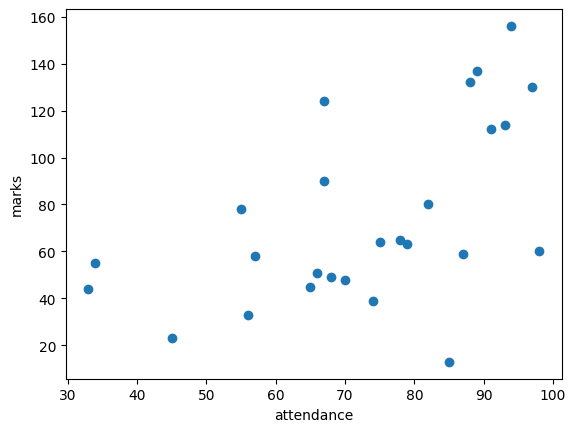

In [4]:
plt.scatter(df['attendance'],df['marks'])
plt.xlabel('attendance')
plt.ylabel('marks')

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['attendance','marks']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 0], dtype=int32)

In [7]:
df['cluster']=y_pred
df

,name,rollno,marks,attendance,cluster
0,A,21,80,82,2
1,B,23,63,79,2
2,C,27,64,75,2
3,D,25,65,78,2
4,E,38,130,97,1
5,F,36,45,65,0
6,G,47,137,89,1
7,H,41,156,94,1
8,I,42,48,70,0
9,J,35,51,66,0


Text(0, 0.5, 'marks')

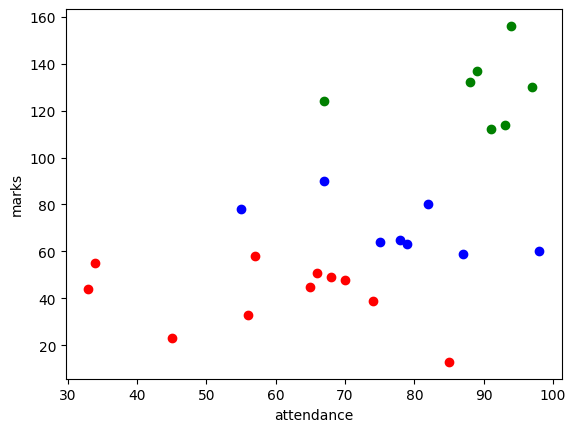

In [8]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.attendance,df1['marks'],color='red')
plt.scatter(df2.attendance,df2['marks'],color='green')
plt.scatter(df3.attendance,df3['marks'],color='blue')
plt.xlabel('attendance')
plt.ylabel('marks')

In [9]:
scale=MinMaxScaler()
scale.fit(df[['marks']])
df['marks']=scale.transform(df[['marks']])
scale.fit(df[['attendance']])
df['attendance'] = scale.transform(df[['attendance']])

In [10]:
df.head()

,name,rollno,marks,attendance,cluster
0,A,21,0.468531,0.753846,2
1,B,23,0.349650,0.707692,2
2,C,27,0.356643,0.646154,2
3,D,25,0.363636,0.692308,2
4,E,38,0.818182,0.984615,1


In [11]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['attendance','marks']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0,
       1, 1, 0, 0], dtype=int32)

In [12]:
df=df.drop(['cluster'],axis='columns')
df

,name,rollno,marks,attendance
0,A,21,0.468531,0.753846
1,B,23,0.349650,0.707692
2,C,27,0.356643,0.646154
3,D,25,0.363636,0.692308
4,E,38,0.818182,0.984615
5,F,36,0.223776,0.492308
6,G,47,0.867133,0.861538
7,H,41,1.000000,0.938462
8,I,42,0.244755,0.569231
9,J,35,0.265734,0.507692


In [13]:
df['cluster']=y_pred
df

,name,rollno,marks,attendance,cluster
0,A,21,0.468531,0.753846,1
1,B,23,0.349650,0.707692,1
2,C,27,0.356643,0.646154,1
3,D,25,0.363636,0.692308,1
4,E,38,0.818182,0.984615,2
5,F,36,0.223776,0.492308,1
6,G,47,0.867133,0.861538,2
7,H,41,1.000000,0.938462,2
8,I,42,0.244755,0.569231,1
9,J,35,0.265734,0.507692,1


In [16]:
km.cluster_centers_

array([[0.46153846, 0.3041958 ],
       [0.85274725, 0.81318681],
       [0.75769231, 0.29632867],
       [0.06666667, 0.19347319]])

Text(0, 0.5, 'marks')

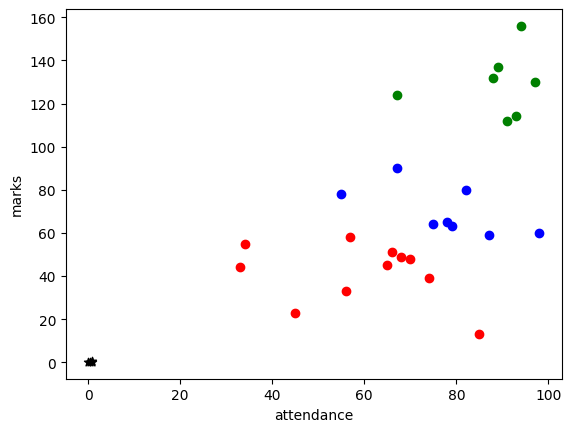

In [17]:
plt.scatter(df1.attendance,df1['marks'],color='red')
plt.scatter(df2.attendance,df2['marks'],color='green')
plt.scatter(df3.attendance,df3['marks'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('attendance')
plt.ylabel('marks')

In [14]:
sse = []
k_range = range(1,5)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['attendance','marks']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


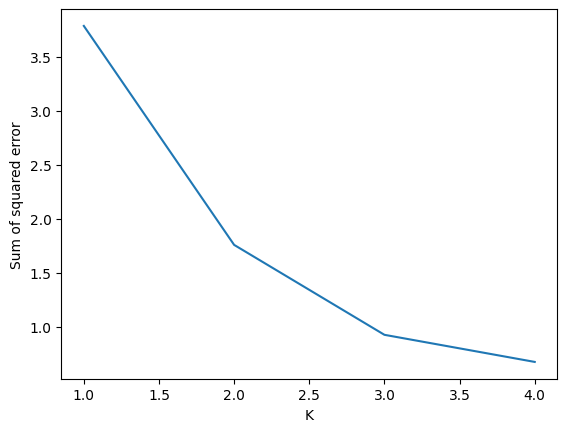

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)